In [2]:
suppressMessages({
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggpubr)
library(gridExtra)
library(cowplot)
})

In [3]:
mytheme = function(){
theme_bw() +
theme(axis.text.x=element_text(size=6,color='black'),
    axis.text.y=element_text(size=6,color="black"),
    axis.title.y=element_text(size=6,color="black"),
    axis.title.x=element_text(size=6,color="black"),
    #axis.ticks.x=element_blank(),
    axis.ticks.length=unit(.02, "in"),
    axis.line = element_line(color = "black", linewidth = 0.25),
    axis.ticks = element_line(color = "black", linewidth = 0.25),
    strip.text.x = element_text(size = 6,margin = margin(0.1,0,0.1,0, "cm")),
    strip.text.y = element_text(size = 6,margin = margin(0,0.1,0,0.1, "cm")),
    strip.background=element_rect(linewidth=0.25),
    legend.text=element_text(size=6,color="black"),
    legend.title=element_text(size=6,color="black"),
    legend.key.width=unit(0.2,'cm'),
    legend.key.height=unit(0.2,'cm'),
    legend.box.margin=margin(0,0,0,2),
    legend.box.spacing = unit(0, "pt"),
    panel.spacing = unit(0.1, "cm"),
    plot.title = element_text(size=5),
    #panel.border = element_rect(size=0.25,color="black"),
    panel.grid = element_blank()
)
}

# Fig.S1B

In [31]:
CLASI = read.table("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/RCLASI_all_sample.xls",head=T, sep="\t",comment.char = "#")

In [32]:
group_color = c('HC' = '#d05204', 'DLE' = '#019167', 'SLE' = '#0166aa')

In [33]:
plot1 = ggplot(CLASI, aes(x=group,y=CLASI_damage, fill=group)) +
    stat_boxplot( geom = "errorbar", width=0.4, linewidth=0.25) +
    geom_boxplot(outlier.shape = NA, size=0.25) + 
    geom_jitter(aes(shape=Sequence_type),size=1.5,width=0.3,color='black',alpha=1, stroke=NA) +
    stat_compare_means(comparisons=list(c('DLE','SLE')), size=2, label.y=6.5, bracket.size=0.25, label = 'p.label', method='wilcox.test') + 
    labs(x="",y='CLASI damage') +
    scale_y_continuous(limits = c(0,7.5)) +
    scale_fill_manual(values=group_color) +
    mytheme()

In [34]:
plot2 = ggplot(CLASI, aes(x=group,y=CLASI_activity, fill=group)) +
    stat_boxplot( geom = "errorbar", width=0.4, linewidth=0.25) +
    geom_boxplot(outlier.shape = NA, size=0.25) + 
    geom_jitter(aes(shape=Sequence_type),size=1.5,width=0.3,color='black',alpha=1, stroke=NA) +
    stat_compare_means(comparisons=list(c('DLE','SLE')), size=2,label.y=25, bracket.size=0.25, label = 'p.label', method='wilcox.test') + 
    labs(x="",y='CLASI activity') +
    scale_y_continuous(limits = c(0,28)) +
    scale_fill_manual(values=group_color) +
    mytheme()

Warning message in wilcox.test.default(c(5, 6, 6, 6, 3, 5, 2, 3), c(2, 0, 1, 2, :
“cannot compute exact p-value with ties”
Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message in wilcox.test.default(c(6, 4, 4, 8, 4, 4, 4, 4), c(24, 9, 6, 5, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(5, 6, 6, 6, 3, 5, 2, 3), c(2, 0, 1, 2, :
“cannot compute exact p-value with ties”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message in wilcox.test.default(c(6, 4, 4, 8, 4, 4, 4, 4), c(24, 9, 6, 5, :
“cannot compute exact p-value with ties”


png 
  2

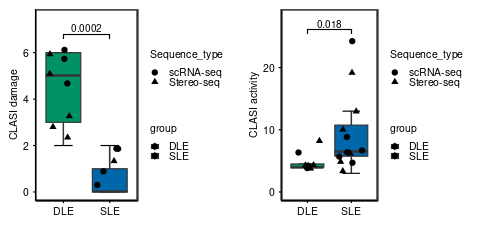

In [35]:
options(repr.plot.width =4,repr.plot.height =2)
plot_grid(plot1,plot2, ncol=2)

pdf("../../figures/CLASI_stat.pdf", w= 4, h=2)
plot_grid(plot1,plot2, ncol=2)
dev.off()